In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from scipy.stats import ttest_1samp
from scipy.stats import linregress

In [10]:
ds_xlsx = pd.read_excel('D:\Coding_Dev\College\SEM_6\machine-learning-niit\Assets\concrete+compressive+strength\Concrete_Data.xlsx')
data =  pd.DataFrame(ds_xlsx)

In [11]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [12]:
target_variable = 'Concrete compressive strength'
predictor_variables = data.columns.difference([target_variable])

best_k_values = {}
best_mse_values = {}
best_p_values = {}

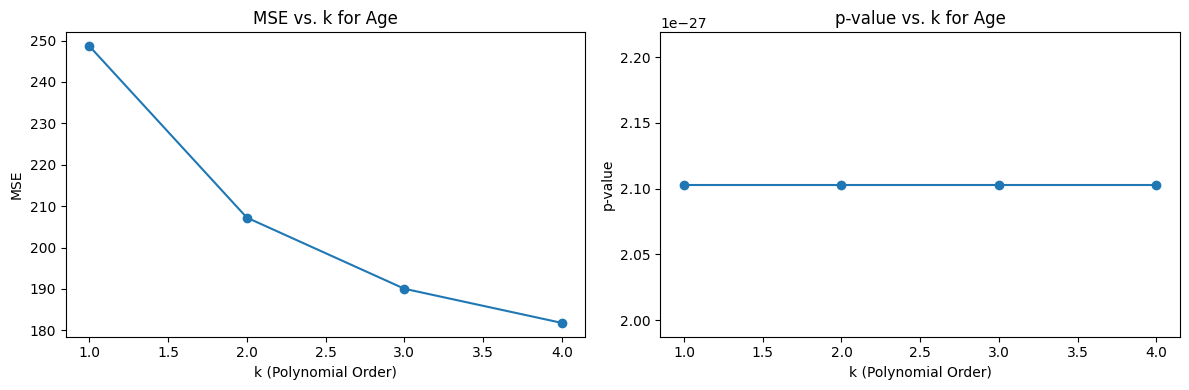

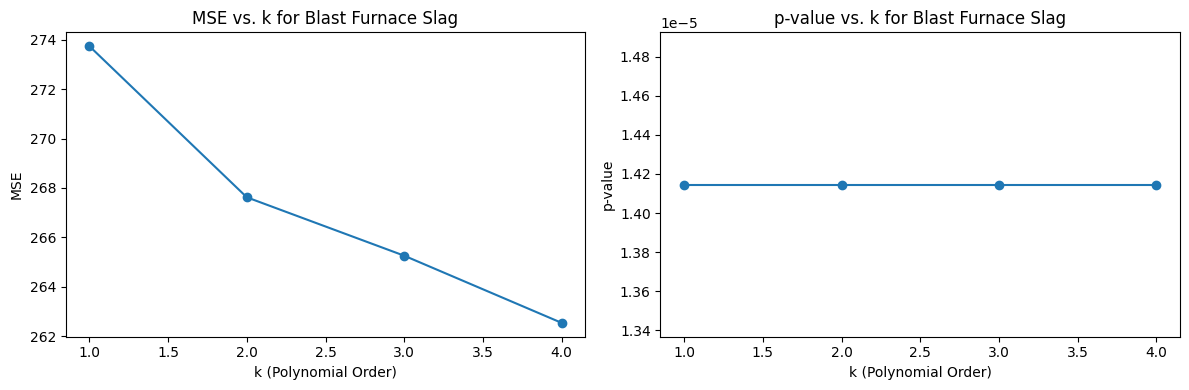

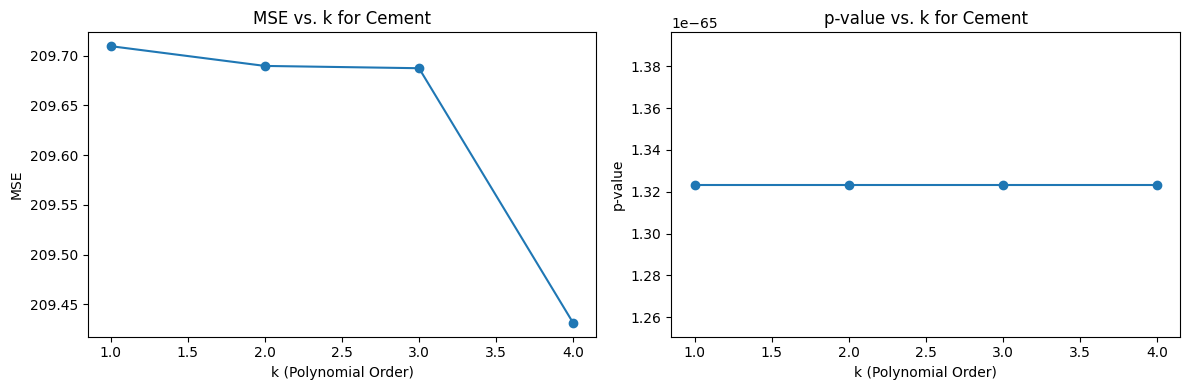

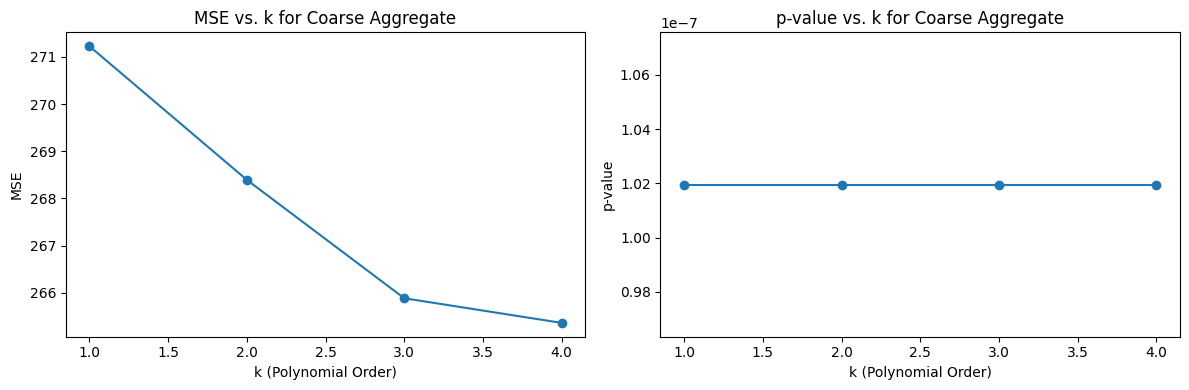

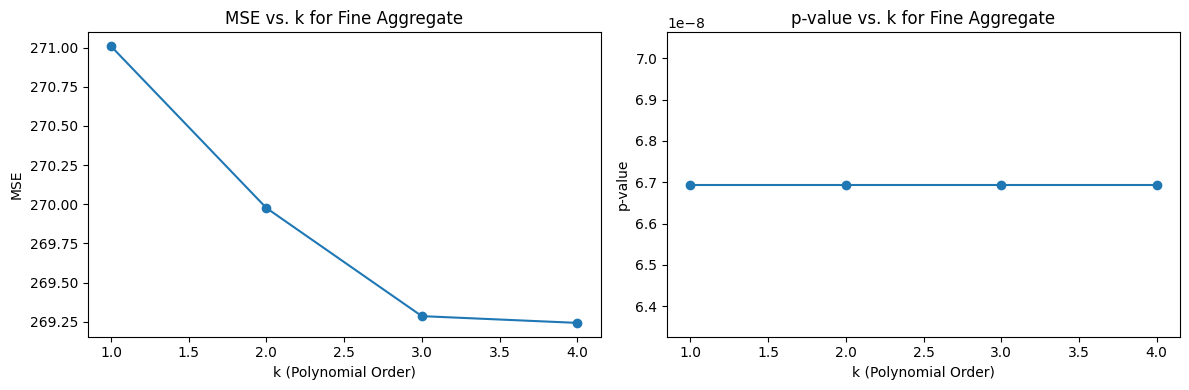

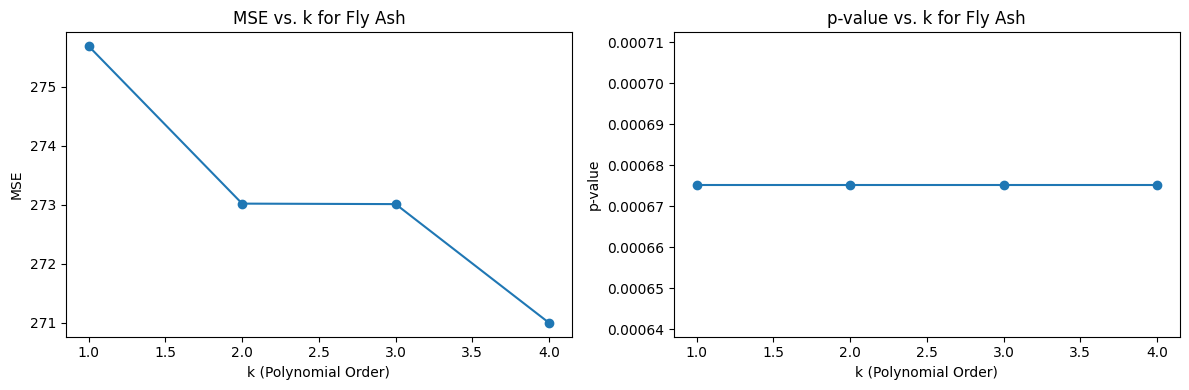

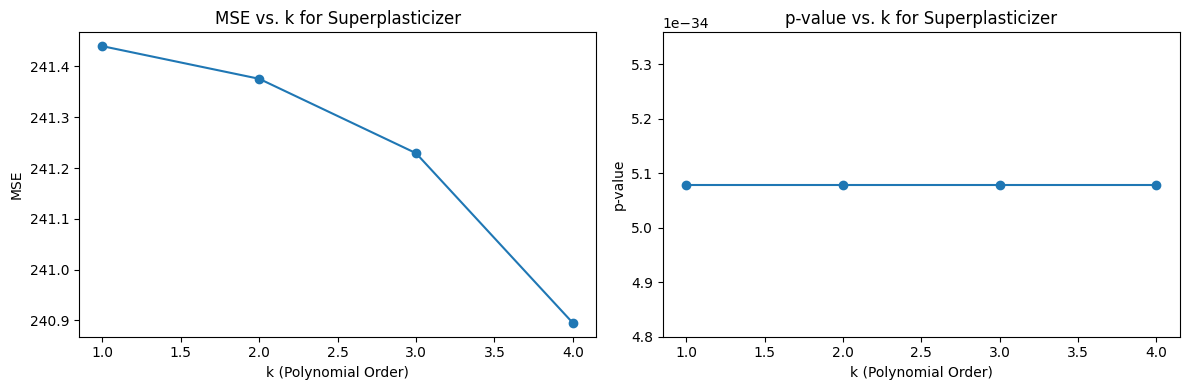

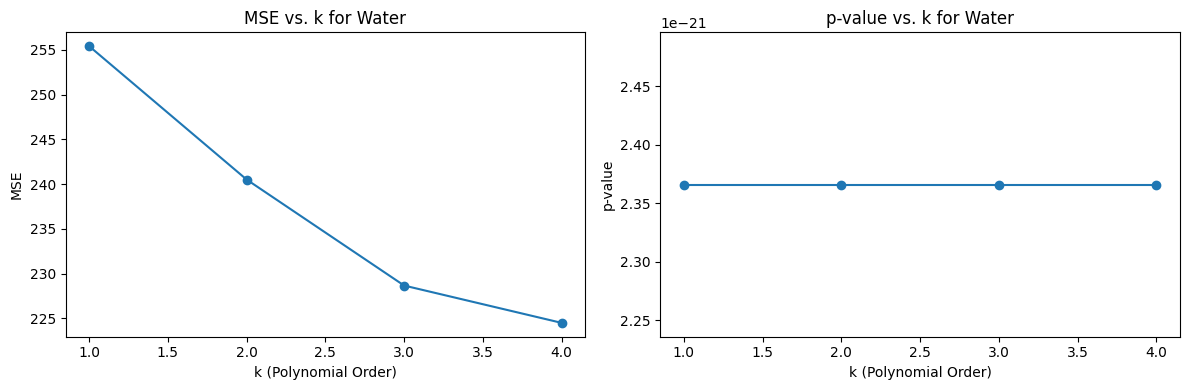

Best k values, MSE values, and p-values for each predictor:
Age: Best k = 4, Best MSE = 181.78705411184836, Best p-value = 2.10314421453746e-27
Blast Furnace Slag: Best k = 4, Best MSE = 262.5375532793833, Best p-value = 1.4145749897776458e-05
Cement: Best k = 4, Best MSE = 209.43142405384376, Best p-value = 1.323457948835464e-65
Coarse Aggregate: Best k = 4, Best MSE = 265.36409215140714, Best p-value = 1.019597222484328e-07
Fine Aggregate: Best k = 4, Best MSE = 269.2422994991031, Best p-value = 6.694681482890678e-08
Fly Ash: Best k = 4, Best MSE = 271.0008153921338, Best p-value = 0.0006752835596174877
Superplasticizer: Best k = 4, Best MSE = 240.89517781543938, Best p-value = 5.0790892363766e-34
Water: Best k = 4, Best MSE = 224.50302433891352, Best p-value = 2.3660726996003887e-21
The best predictor according to mse value is: Age
The best predictor according to p value is: Cement


In [16]:
for predictor in predictor_variables:
    k_values = list(range(1, 5))
    mse_values = []  # To store MSE values for different k
    p_values = []  # To store p-values for different k

    for k in k_values:
        # Extract the predictor and target variables
        X = data[predictor].values.reshape(-1, 1)
        y = data[target_variable]

        # Fit a polynomial regression model of order k
        polynomial_features = PolynomialFeatures(degree=k)
        X_poly = polynomial_features.fit_transform(X)
        model = LinearRegression()
        model.fit(X_poly, y)

        # Make predictions
        y_pred = model.predict(X_poly)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y, y_pred)
        mse_values.append(mse)

        # Perform a linear regression to get the p-value
        slope, intercept, r_value, p_value, std_err = linregress(X[:, 0], y)
        p_values.append(p_value)

    # Find the best k for this predictor
    best_k = k_values[np.argmin(mse_values)]
    best_k_values[predictor] = best_k
    best_mse_values[predictor] = min(mse_values)
    best_p_values[predictor] = p_values[k_values.index(best_k)]

    # Create a subplot of MSE vs k and p-value vs k for this predictor
    plt.figure(figsize=(12, 4))

    # Plot MSE values
    plt.subplot(1, 2, 1)
    plt.plot(k_values, mse_values, marker='o')
    plt.title(f'MSE vs. k for {predictor}')
    plt.xlabel('k (Polynomial Order)')
    plt.ylabel('MSE')

    # Plot p-values
    plt.subplot(1, 2, 2)
    plt.plot(k_values, p_values, marker='o')
    plt.title(f'p-value vs. k for {predictor}')
    plt.xlabel('k (Polynomial Order)')
    plt.ylabel('p-value')

    plt.tight_layout()
    plt.show()

# Determine the best value for k, best MSE, and best p-value for each predictor
print("Best k values, MSE values, and p-values for each predictor:")
for predictor in predictor_variables:
    print(f"{predictor}: Best k = {best_k_values[predictor]}, Best MSE = {best_mse_values[predictor]}, Best p-value = {best_p_values[predictor]}")

# Find the overall best predictor
best_predictor_mse = min(best_mse_values, key=lambda x: best_mse_values[x])
print(f"The best predictor according to mse value is: {best_predictor_mse}")


best_predictor_p_value = min(best_p_values, key=lambda x: best_p_values[x])
print(f"The best predictor according to p value is: {best_predictor_p_value}")